<a href="https://colab.research.google.com/github/Athrudev/jupyter-notebooks/blob/main/machine_learning_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

#**Dateset**

https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [ ]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('magic04.data',names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


#**gamma=1 and hedron=0**
our computer is not good at undertanding letter,thar's why we converting gamma and hedron to 0 and 1,for mathemtical procedure

In [ ]:
df['class'].unique()
df['class'] = (df['class']=='g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


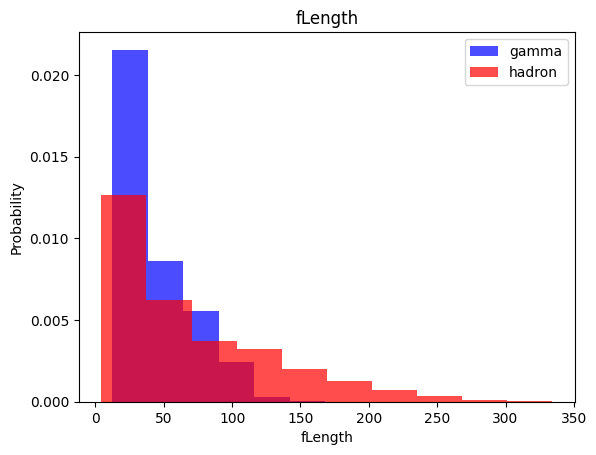

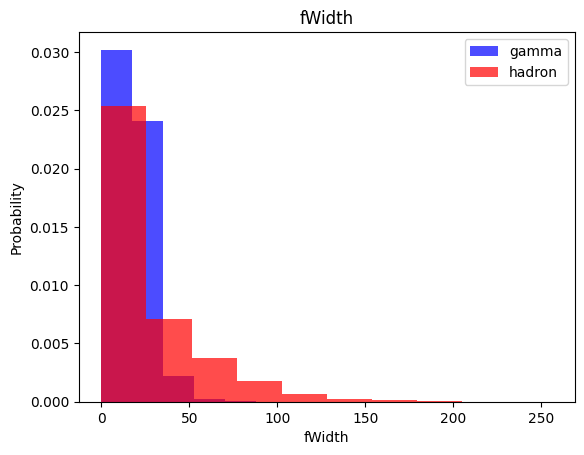

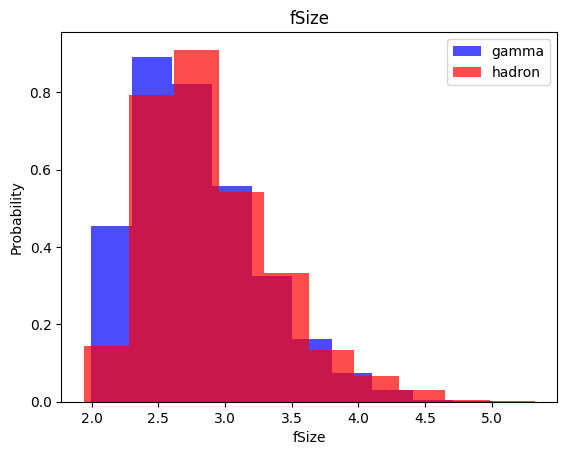

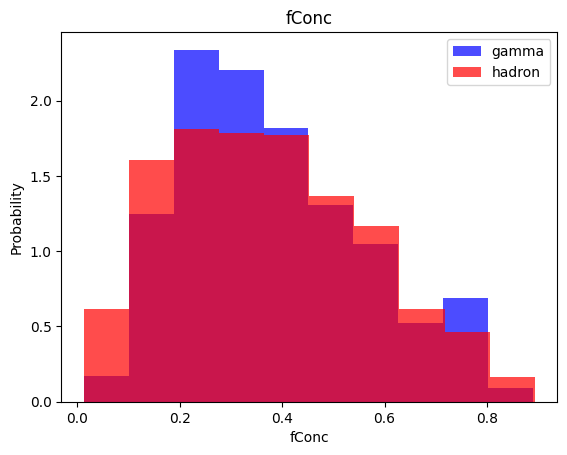

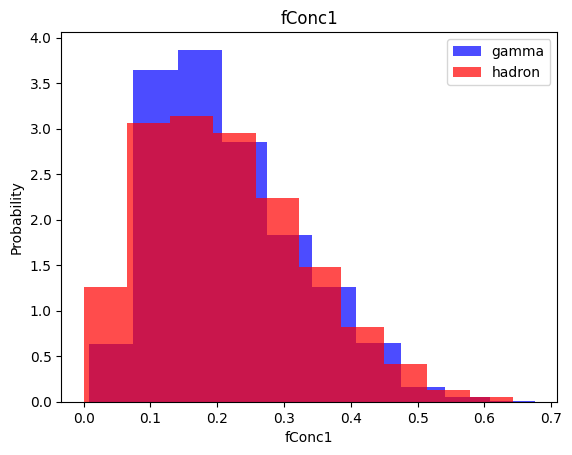

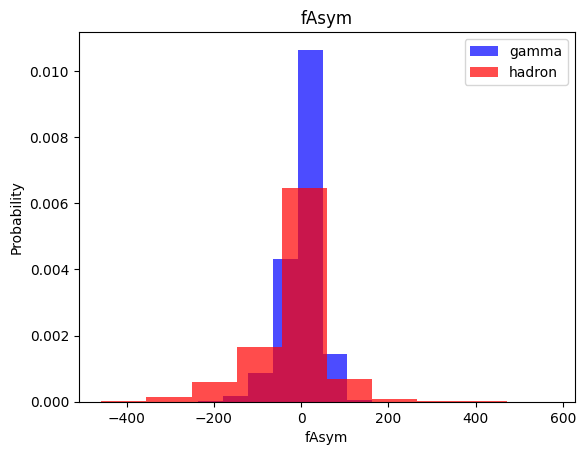

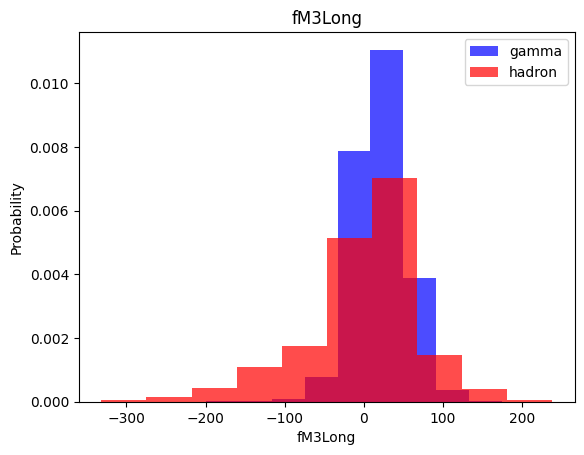

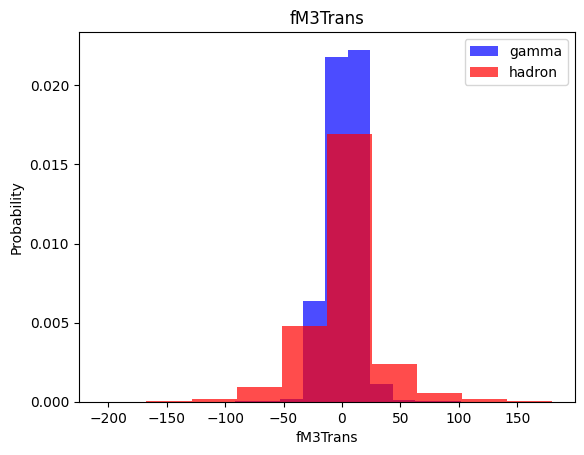

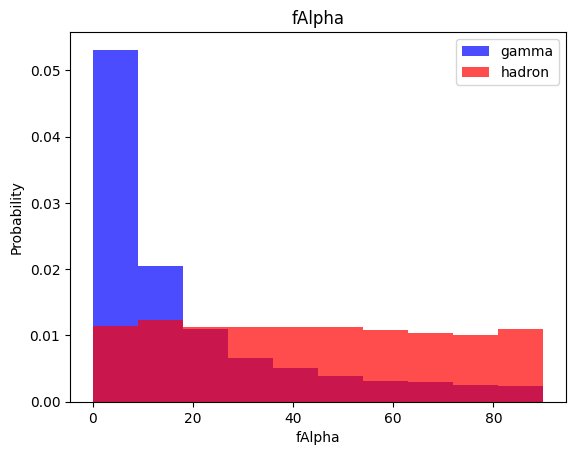

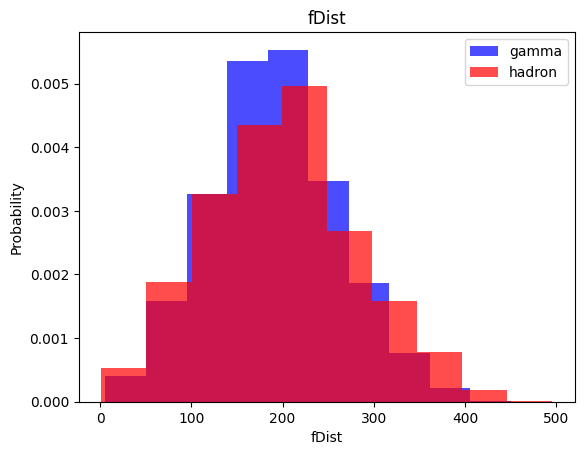

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df['class']==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#**Train, validation and test data**

In [19]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [21]:
def scale_dataset(df,overasample=False):
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if overasample:
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)

  data=np.hstack((X,np.reshape(y,(-1,1))))
  return data,X,y

In [22]:
train, X_train,Y_train=scale_dataset(train,overasample=True)
valid, X_valid,Y_valid=scale_dataset(valid,overasample=False)
test, X_test,Y_test=scale_dataset(test,overasample=False)

In [26]:
print(len(train),len(X_train),len(Y_train))
print(len(valid),len(X_valid),len(Y_valid))
print(len(test),len(X_test),len(Y_test))

14836 14836 14836
3804 3804 3804
3804 3804 3804


#**KNN Model**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


KNeighborsClassifier()

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,Y_train)
y_pred=knn_model.predict(X_train)

In [35]:
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7418
           1       0.90      0.90      0.90      7418

    accuracy                           0.90     14836
   macro avg       0.90      0.90      0.90     14836
weighted avg       0.90      0.90      0.90     14836



#**Navie Bayes**

In [36]:
from sklearn.naive_bayes import GaussianNB


In [37]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)
y_pred = nb_model.predict(X_train)

In [38]:
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.40      0.53      7418
           1       0.60      0.90      0.72      7418

    accuracy                           0.65     14836
   macro avg       0.70      0.65      0.63     14836
weighted avg       0.70      0.65      0.63     14836



#**Log regression**

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,Y_train)
y_pred = lg_model.predict(X_train)

In [41]:
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      7418
           1       0.75      0.83      0.79      7418

    accuracy                           0.78     14836
   macro avg       0.78      0.78      0.78     14836
weighted avg       0.78      0.78      0.78     14836



#**SVM**

In [42]:
from sklearn.svm import SVC

In [44]:
svm_model=SVC()
svm_model=svm_model.fit(X_train,Y_train)
y_pred=svm_model.predict(X_train)

In [45]:
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7418
           1       0.83      0.90      0.86      7418

    accuracy                           0.86     14836
   macro avg       0.86      0.86      0.85     14836
weighted avg       0.86      0.86      0.85     14836



#**Neural network**

In [47]:
import tensorflow as tf

In [50]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_accuracy(history):
  plt.plot(history.history['accuracy'],label='accuracy')
  plt.plot(history.history['val_accuracy'],label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [48]:
nn_model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

nn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
history=nn_model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8679 - loss: 0.3143 - val_accuracy: 0.7463 - val_loss: 0.4836
Epoch 2/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8732 - loss: 0.3037 - val_accuracy: 0.7746 - val_loss: 0.4388
Epoch 3/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8713 - loss: 0.3050 - val_accuracy: 0.7672 - val_loss: 0.4373
Epoch 4/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8749 - loss: 0.3000 - val_accuracy: 0.7409 - val_loss: 0.4911
Epoch 5/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8723 - loss: 0.3018 - val_accuracy: 0.7530 - val_loss: 0.4661
Epoch 6/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8768 - loss: 0.2978 - val_accuracy: 0.7642 - val_loss: 0.4412
Epoch 7/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8755 - loss: 0.2969 - val_accuracy: 0.7608 - val_loss: 0.4707
Epoch 8/100
371/371 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8809 - loss: 0.2889 - val_accu

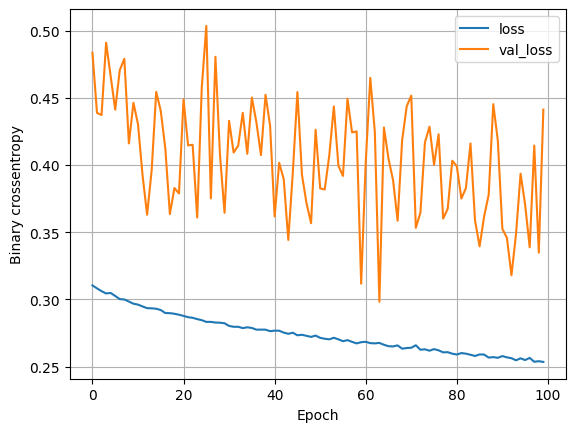

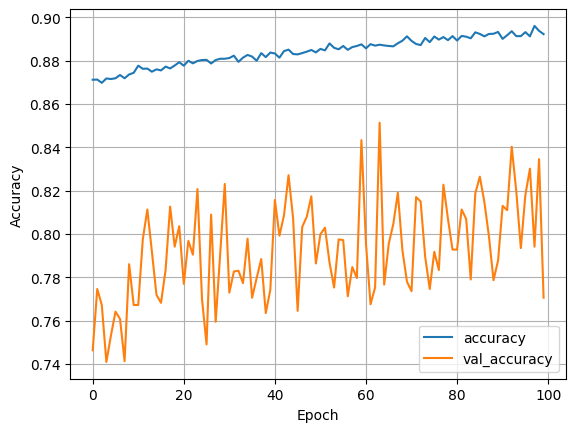

In [53]:
plot_loss(history)
plot_accuracy(history)
#plot_history(history)